In [1]:
library(tidyverse)
library(dplyr)
library(car)
library(corrplot)
library(pROC)
library(MLmetrics)
library(rpart)
library(rpart.plot) 
library(randomForest)
library(varImp)
library(gbm)
library(caret)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
Warning message:
"package 'ggplot2' was built under R version 4.2.2"
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
"package 'car' was built under R version 4.2.2"
Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some


Warning message:
"

In [2]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
cancerdata <- read.csv(file = url, header = FALSE,
                 col.names = c("ID","clump_thickness", "uniformity_size", "uniformity_shape", "marginal_adhesion", "single_epithelial_cell_size", "bare_nuclei", "bland_chromatin", "normal_nucleoli","mitoses", "diagnosis"))

str(cancerdata)

'data.frame':	699 obs. of  11 variables:
 $ ID                         : int  1000025 1002945 1015425 1016277 1017023 1017122 1018099 1018561 1033078 1033078 ...
 $ clump_thickness            : int  5 5 3 6 4 8 1 2 2 4 ...
 $ uniformity_size            : int  1 4 1 8 1 10 1 1 1 2 ...
 $ uniformity_shape           : int  1 4 1 8 1 10 1 2 1 1 ...
 $ marginal_adhesion          : int  1 5 1 1 3 8 1 1 1 1 ...
 $ single_epithelial_cell_size: int  2 7 2 3 2 7 2 2 2 2 ...
 $ bare_nuclei                : chr  "1" "10" "2" "4" ...
 $ bland_chromatin            : int  3 3 3 3 3 9 3 3 1 2 ...
 $ normal_nucleoli            : int  1 2 1 7 1 7 1 1 1 1 ...
 $ mitoses                    : int  1 1 1 1 1 1 1 1 5 1 ...
 $ diagnosis                  : int  2 2 2 2 2 4 2 2 2 2 ...


In [3]:
sum(cancerdata$bare_nuclei == "?")

[1] 16

In [4]:
cancerdata <- select(cancerdata, -1)


In [5]:
head(cancerdata)

,clump_thickness,uniformity_size,uniformity_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,diagnosis
,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>
1,5,1,1,1,2,1,3,1,1,2
2,5,4,4,5,7,10,3,2,1,2
3,3,1,1,1,2,2,3,1,1,2
4,6,8,8,1,3,4,3,7,1,2
5,4,1,1,3,2,1,3,1,1,2
6,8,10,10,8,7,10,9,7,1,4


In [6]:
cancerdata <- cancerdata[cancerdata$bare_nuclei != "?",] %>% mutate(bare_nuclei = as.integer(as.character((bare_nuclei))))

In [7]:
cancerdata <- cancerdata %>% mutate(diagnosis = ifelse(diagnosis == 2, 0, 1),
                        diagnosis = as.factor(diagnosis))


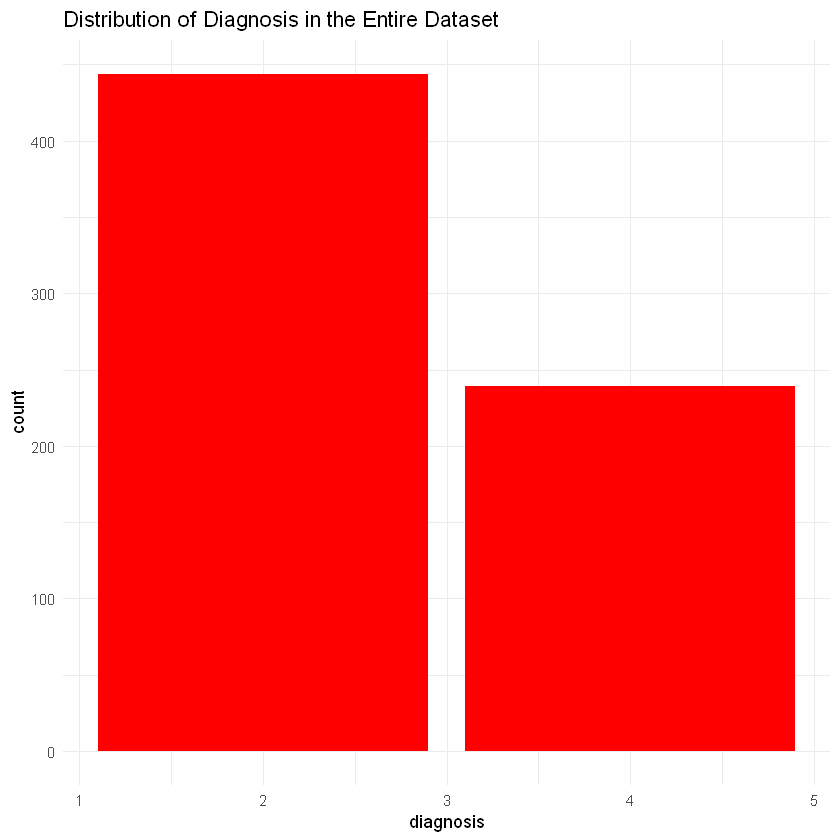

In [8]:
ggplot(data, aes(x = diagnosis)) +
  geom_bar(fill = "red") +
  ggtitle("Distribution of Diagnosis in the Entire Dataset") +
  theme_minimal() +
  theme(legend.position = "none")

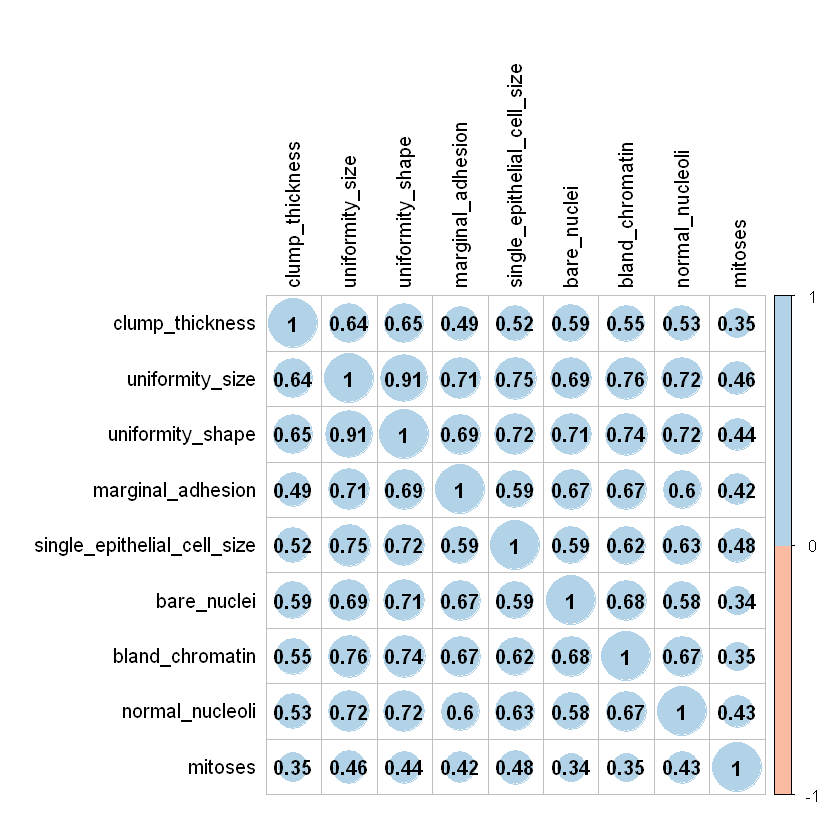

In [9]:
correlation <- cor(cancerdata[,-10])
corrplot(correlation, col = c("#fcbba1", "#b2d2e8"), addCoef.col = "black", tl.col = "black")

In [10]:
set.seed(3011) 
train_index <- sample(nrow(cancerdata), size = round(0.70 * nrow(cancerdata)), replace = FALSE)
train <- cancerdata[train_index,]
test <- cancerdata[-train_index,]


In [11]:
test$diagnosis

[1] 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1
 [38] 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1
 [75] 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0
[112] 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0
[149] 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0
[186] 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0
Levels: 0 1

In [12]:
head(train)

,clump_thickness,uniformity_size,uniformity_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,diagnosis
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
224,7,5,6,3,3,8,7,4,1,1
641,4,1,1,3,2,1,1,1,1,0
330,10,4,6,4,5,10,7,1,1,1
653,5,1,1,1,2,1,2,2,1,0
634,8,7,4,4,5,3,5,10,1,1
495,5,1,2,10,4,5,2,1,1,0


In [13]:
lm <- glm(diagnosis~., data = train, family=binomial())
summary(lm)


Call:
glm(formula = diagnosis ~ ., family = binomial(), data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.97669  -0.09604  -0.05255   0.01633   2.51530  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -10.90839    1.52524  -7.152 8.56e-13 ***
clump_thickness               0.58422    0.17601   3.319 0.000903 ***
uniformity_size              -0.42170    0.28007  -1.506 0.132145    
uniformity_shape              0.45155    0.29871   1.512 0.130613    
marginal_adhesion             0.34826    0.15409   2.260 0.023812 *  
single_epithelial_cell_size   0.03309    0.24234   0.137 0.891399    
bare_nuclei                   0.40814    0.11776   3.466 0.000528 ***
bland_chromatin               0.65408    0.20359   3.213 0.001315 ** 
normal_nucleoli               0.43168    0.16422   2.629 0.008574 ** 
mitoses                       0.56310    0.37376   1.507 0.131920    
---
Signif. codes:  

##Deleting the variable which doesnot have significant value of p
single_epithelial_cell_size  .  
bare_nuclei1
bare_nuclei2
mitoses

In [15]:
vif(lm)

clump_thickness             uniformity_size 
                   1.268866                    4.204806 
           uniformity_shape           marginal_adhesion 
                   3.749472                    1.243885 
single_epithelial_cell_size                 bare_nuclei 
                   1.669039                    1.268569 
            bland_chromatin             normal_nucleoli 
                   1.399204                    1.213592 
                    mitoses 
                   1.096583

In [16]:
lm2 <- glm(formula = diagnosis ~ ., data = train %>% select(-c(uniformity_size, single_epithelial_cell_size, mitoses)),family=binomial())
summary(lm2)
vif(lm2)


Call:
glm(formula = diagnosis ~ ., family = binomial(), data = train %>% 
    select(-c(uniformity_size, single_epithelial_cell_size, mitoses)))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.63687  -0.11037  -0.05221   0.01876   2.45831  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -10.2093     1.3940  -7.324 2.41e-13 ***
clump_thickness     0.6606     0.1635   4.041 5.33e-05 ***
uniformity_shape    0.1772     0.1867   0.949 0.342581    
marginal_adhesion   0.3152     0.1419   2.221 0.026344 *  
bare_nuclei         0.3924     0.1121   3.500 0.000466 ***
bland_chromatin     0.5561     0.1860   2.990 0.002788 ** 
normal_nucleoli     0.3982     0.1448   2.749 0.005973 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 605.221  on 477  degrees of freedom
Residual deviance:  70.627  on 471  degrees of freedom
AIC: 84

clump_thickness  uniformity_shape marginal_adhesion       bare_nuclei 
         1.183815          1.485459          1.084516          1.216637 
  bland_chromatin   normal_nucleoli 
         1.132072          1.098415

In [17]:
lm3 <- glm(formula = diagnosis ~ ., data = train %>% select(-c(uniformity_size, single_epithelial_cell_size, bare_nuclei, mitoses)),family=binomial())
summary(lm3)


Call:
glm(formula = diagnosis ~ ., family = binomial(), data = train %>% 
    select(-c(uniformity_size, single_epithelial_cell_size, bare_nuclei, 
        mitoses)))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.46876  -0.12491  -0.06328   0.01648   2.87512  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -10.0595     1.2363  -8.137 4.06e-16 ***
clump_thickness     0.6334     0.1459   4.343 1.41e-05 ***
uniformity_shape    0.4874     0.1721   2.832  0.00463 ** 
marginal_adhesion   0.3869     0.1279   3.025  0.00248 ** 
bland_chromatin     0.6882     0.1758   3.915 9.03e-05 ***
normal_nucleoli     0.3844     0.1464   2.626  0.00865 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 605.221  on 477  degrees of freedom
Residual deviance:  84.562  on 472  degrees of freedom
AIC: 96.562

Number of Fisher Scoring iterat

In [18]:
vif(lm3)

clump_thickness  uniformity_shape marginal_adhesion   bland_chromatin 
         1.083840          1.163631          1.066701          1.078896 
  normal_nucleoli 
         1.081668

Setting levels: control = 0, case = 1

Setting direction: controls < cases



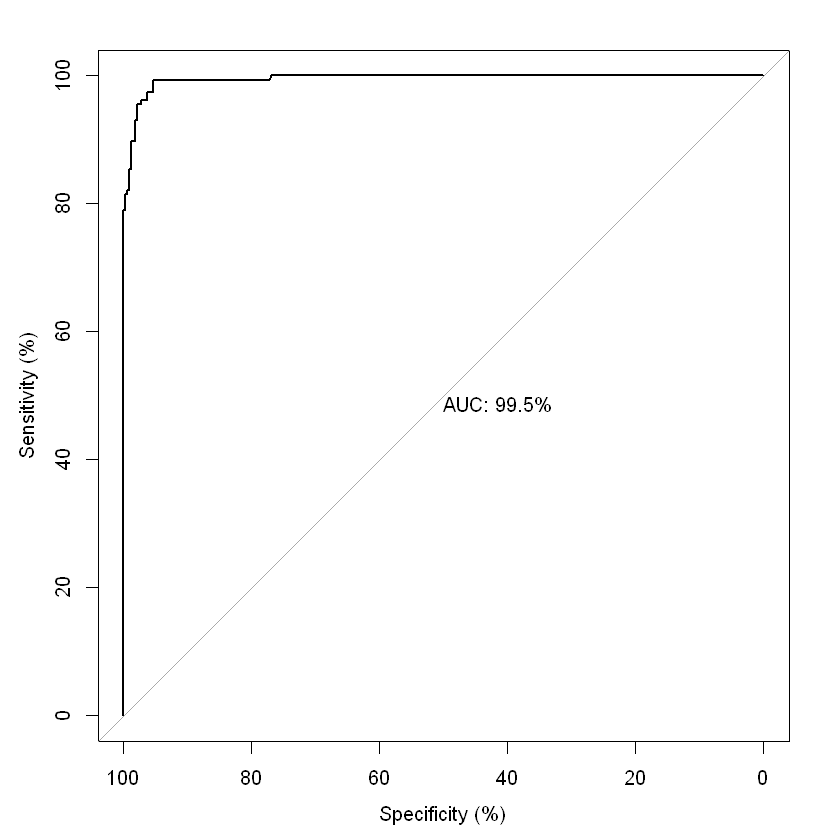

In [19]:
predtrain<- predict(lm3, train, type = 'response')
AUCtrain<- roc(train$diagnosis, predtrain, percent = TRUE, plot = TRUE, print.auc = TRUE)

In [20]:

accuracy <- 0
f1 <- 0
threshold <- 0

for(i in seq(0.1, 0.9, by = 0.01)){
  predtrain <- ifelse(predtrain < i, 0, 1)
  a = Accuracy(y_true = train$diagnosis, y_pred = predtrain)
  b = F1_Score(y_true = train$diagnosis, y_pred = predtrain)
  
  if(a > accuracy & b > f1)
   TRUE:
    { 
    accuracy = a
    f1 = b
    threshold = i
  }
}
accuracy


[1] 0.9623431

In [21]:
a <-Accuracy(y_true = train$diagnosis, y_pred = predtrain)
round(a,3)


[1] 0.962

In [22]:
threshold

[1] 0.1

In [23]:
table(Actualvalue=train$diagnosis,Predictedvalue=predtrain>0.5)

           Predictedvalue
Actualvalue FALSE TRUE
          0   304   17
          1     1  156

In [24]:
pred.classes <- (predtrain)
head(pred.classes)

224 641 330 653 634 495 
  1   0   1   0   1   1

Setting levels: control = 0, case = 1

Setting direction: controls < cases



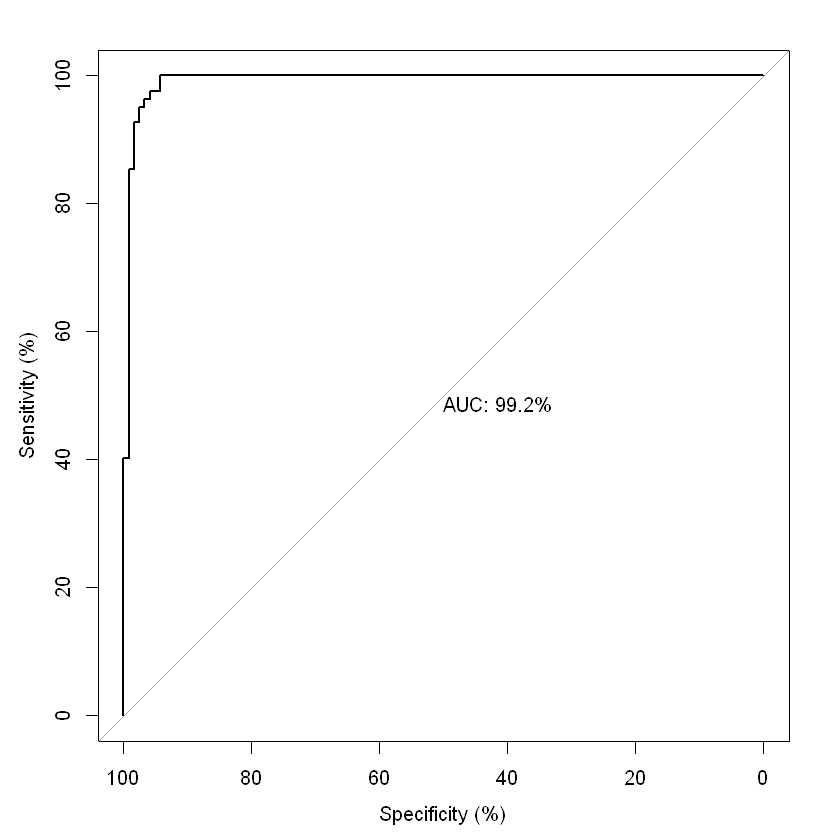

In [25]:
predtest <- predict(lm3, test, type = 'response')

AUCtest <- roc(test$diagnosis, predtest, percent = TRUE, plot = TRUE, print.auc = TRUE)

In [26]:
predtest1 <- ifelse(predtest>= 0.48, 1, 0)
round(Accuracy(y_true = test$diagnosis, y_pred = predtest1),3)


[1] 0.966

In [27]:
ConfusionMatrix(y_true = test$diagnosis, y_pred = predtest1)

      y_pred
y_true   0   1
     0 118   5
     1   2  80